# Dynamics of quantum walk on glued tree

In [12]:
from glue_tree import *

Generating glued tree with depth 3
Each tree has 15 vertices
Total number of vertices: 30

Glued connections between leaves:
  Leaf 7 (Tree 0) ↔ Leaf 25 (Tree 1)
  Leaf 25 (Tree 0) ↔ Leaf 8 (Tree 1)
  Leaf 8 (Tree 0) ↔ Leaf 27 (Tree 1)
  Leaf 27 (Tree 0) ↔ Leaf 9 (Tree 1)
  Leaf 9 (Tree 0) ↔ Leaf 26 (Tree 1)
  Leaf 26 (Tree 0) ↔ Leaf 10 (Tree 1)
  Leaf 10 (Tree 0) ↔ Leaf 24 (Tree 1)
  Leaf 24 (Tree 0) ↔ Leaf 11 (Tree 1)
  Leaf 11 (Tree 0) ↔ Leaf 23 (Tree 1)
  Leaf 23 (Tree 0) ↔ Leaf 12 (Tree 1)
  Leaf 12 (Tree 0) ↔ Leaf 29 (Tree 1)
  Leaf 29 (Tree 0) ↔ Leaf 13 (Tree 1)
  Leaf 13 (Tree 0) ↔ Leaf 22 (Tree 1)
  Leaf 22 (Tree 0) ↔ Leaf 14 (Tree 1)
  Leaf 14 (Tree 0) ↔ Leaf 28 (Tree 1)
  Leaf 28 (Tree 0) ↔ Leaf 7 (Tree 1)

Hamiltonian (Adjacency Matrix):
 0: [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 1: [1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 2: [1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 3: [0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0

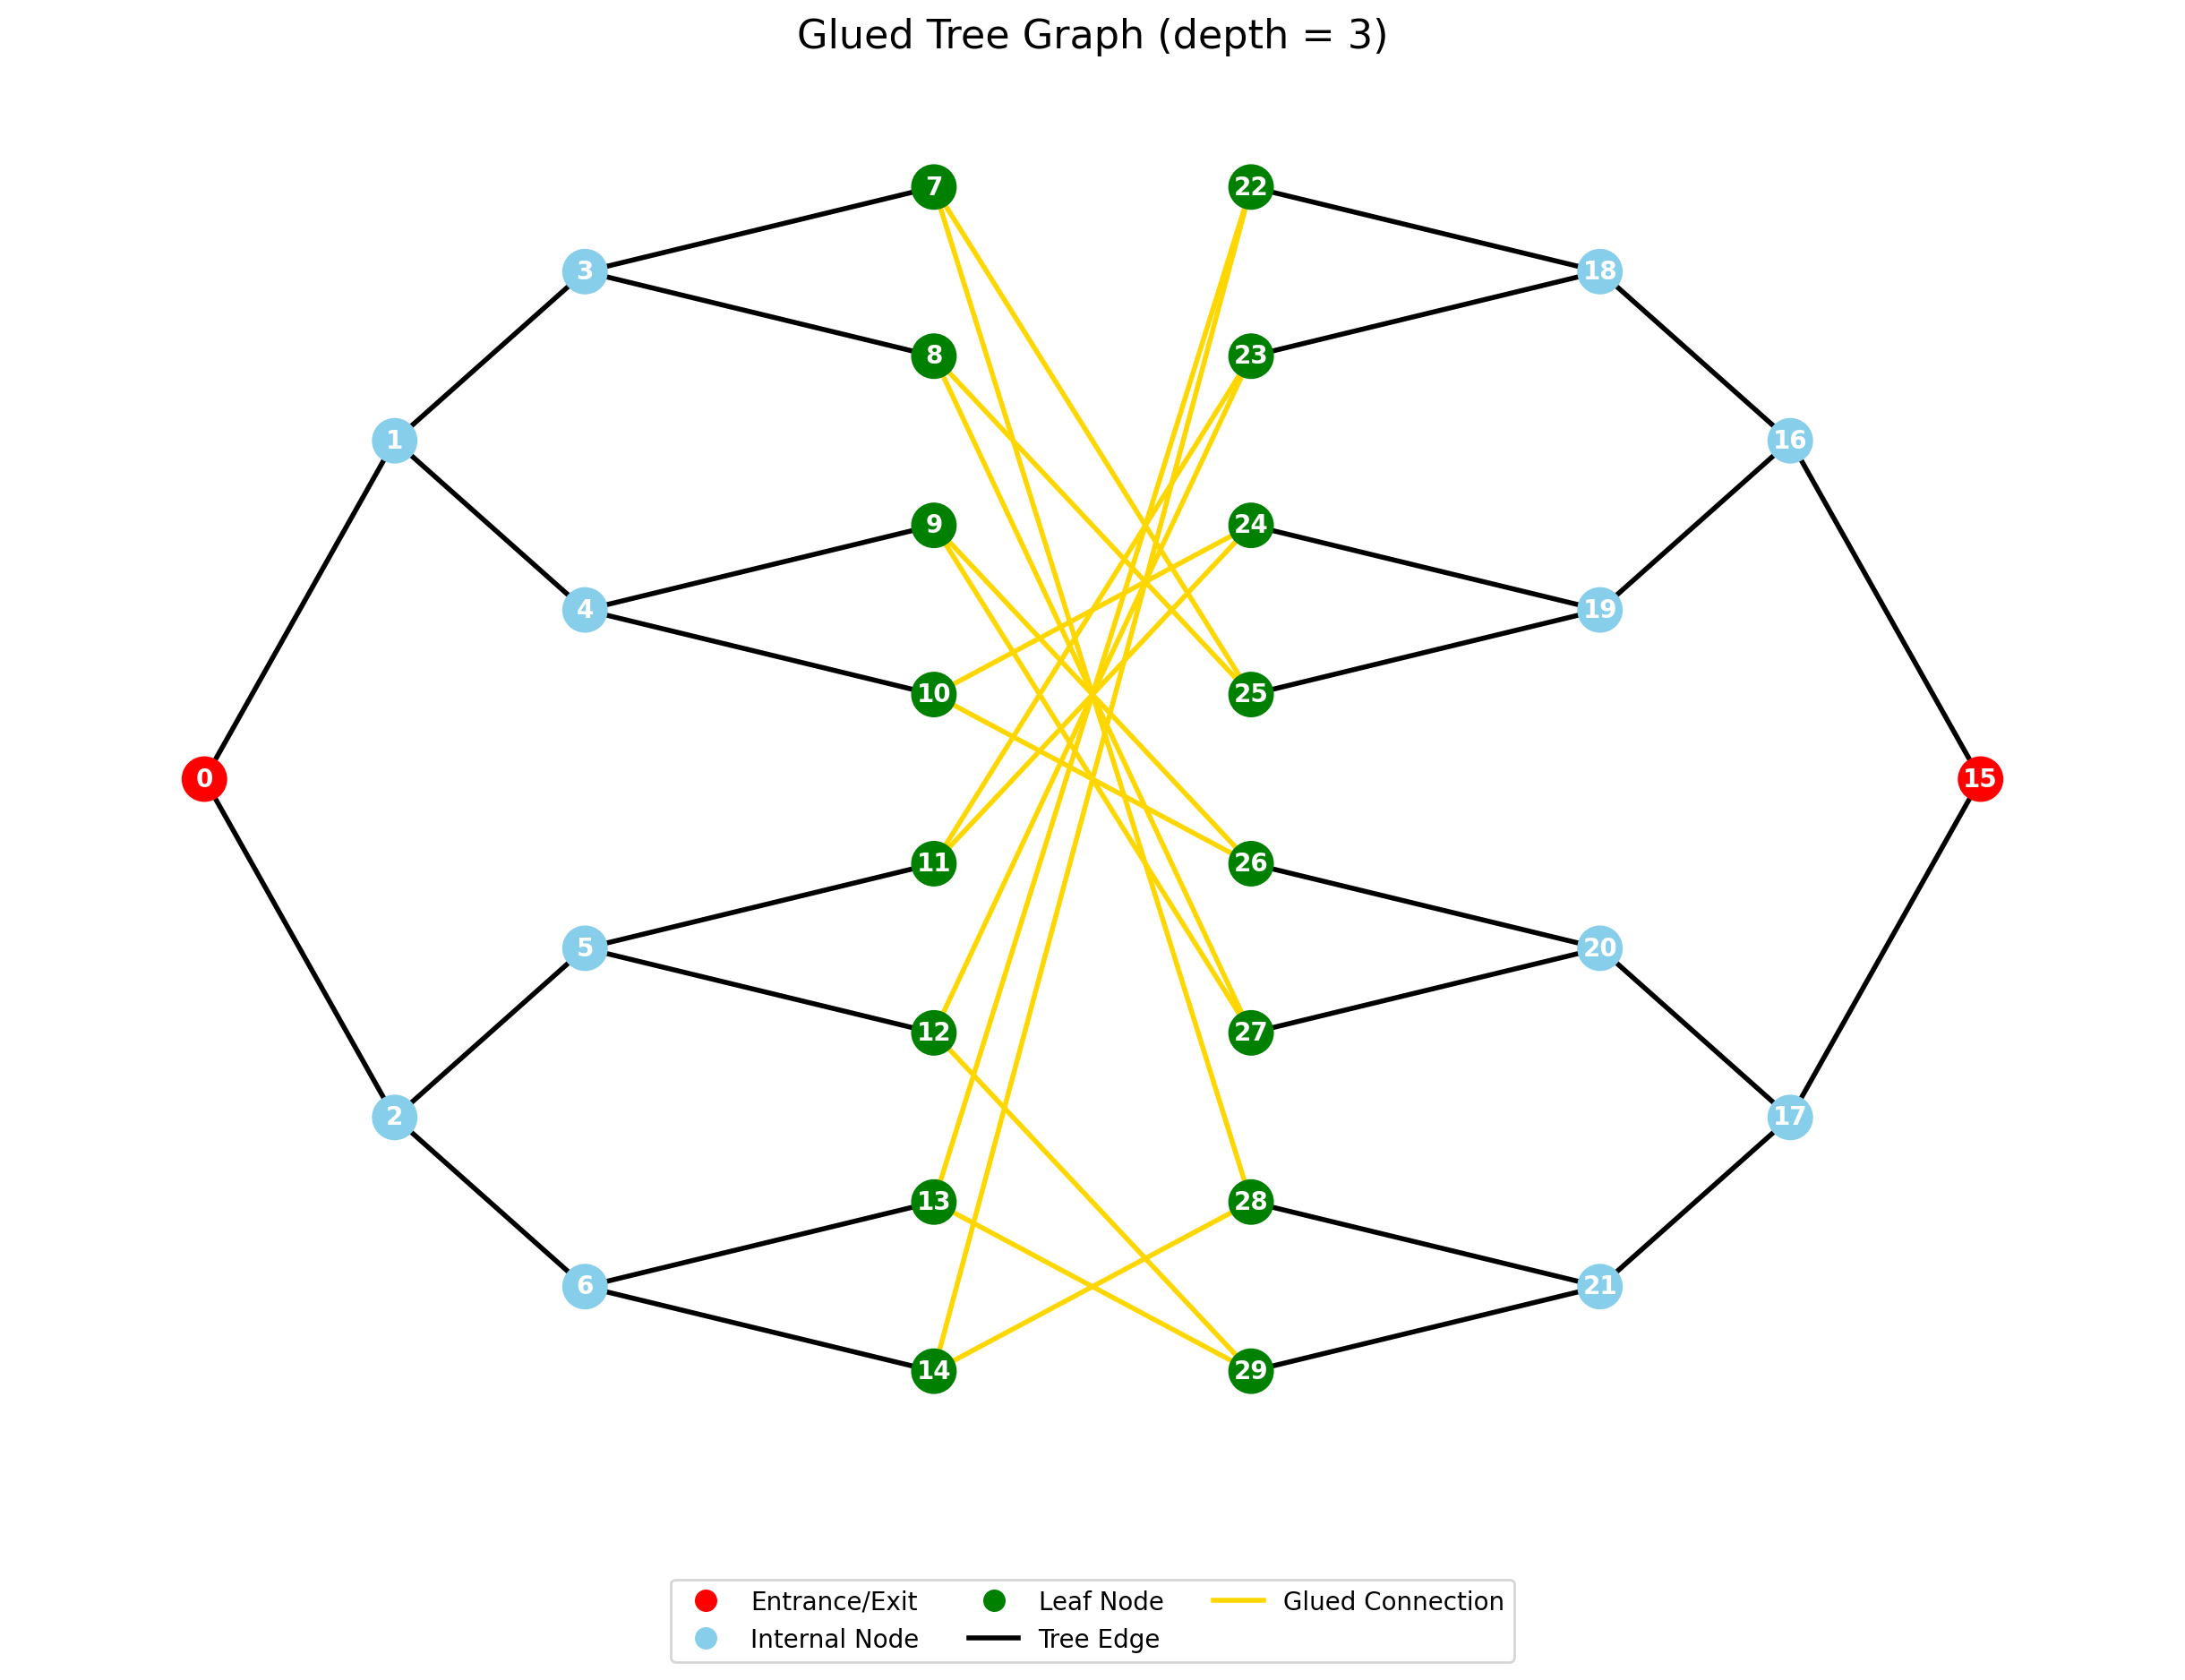

In [13]:
# Example usage
# Generate a Hamiltonian for a glued tree with depth 2
depth = 3
H = generate_glued_tree_hamiltonian(depth=depth)
# H = generate_glued_tree_hamiltonian(depth=depth, seed=42)

# Print the Hamiltonian
print_hamiltonian(H)

# Convert the Hamiltonian to a graph
G = hamiltonian_to_graph(H)

# Identify important components of the graph
components = identify_graph_components(H, depth)
print("\nGraph Components:")
print(f"  Entrance: {components['entrance']}")
print(f"  Exit: {components['exit']}")
print(f"  Tree 0 Leaves: {components['tree0_leaves']}")
print(f"  Tree 1 Leaves: {components['tree1_leaves']}")
print("  Glued Connections:")
for leaf0, leaf1 in components['glued_pairs']:
    print(f"    {leaf0} ↔ {leaf1}")

# Visualize the graph
visualize_glued_tree_graph(G, depth, save_file=f"./figs/childs_glued_tree_depth_{depth}.pdf")

In [14]:
from qiskit.quantum_info import Statevector
import numpy as np

dim = len(H)
# print(dim)
init_state = dim * [0]
init_state[0] = 1

t_list = np.linspace(0, 5, 100)
amp_entr = [expH(H, t).dot(init_state)[0] for t in t_list]
amp_exit = [expH(H, t).dot(init_state)[15] for t in t_list] # 15 is the exit node in the glued tree with depth 3
amp_midd = [expH(H, t).dot(init_state)[22] for t in t_list] # 22 is the middle node in the glued tree with depth 3

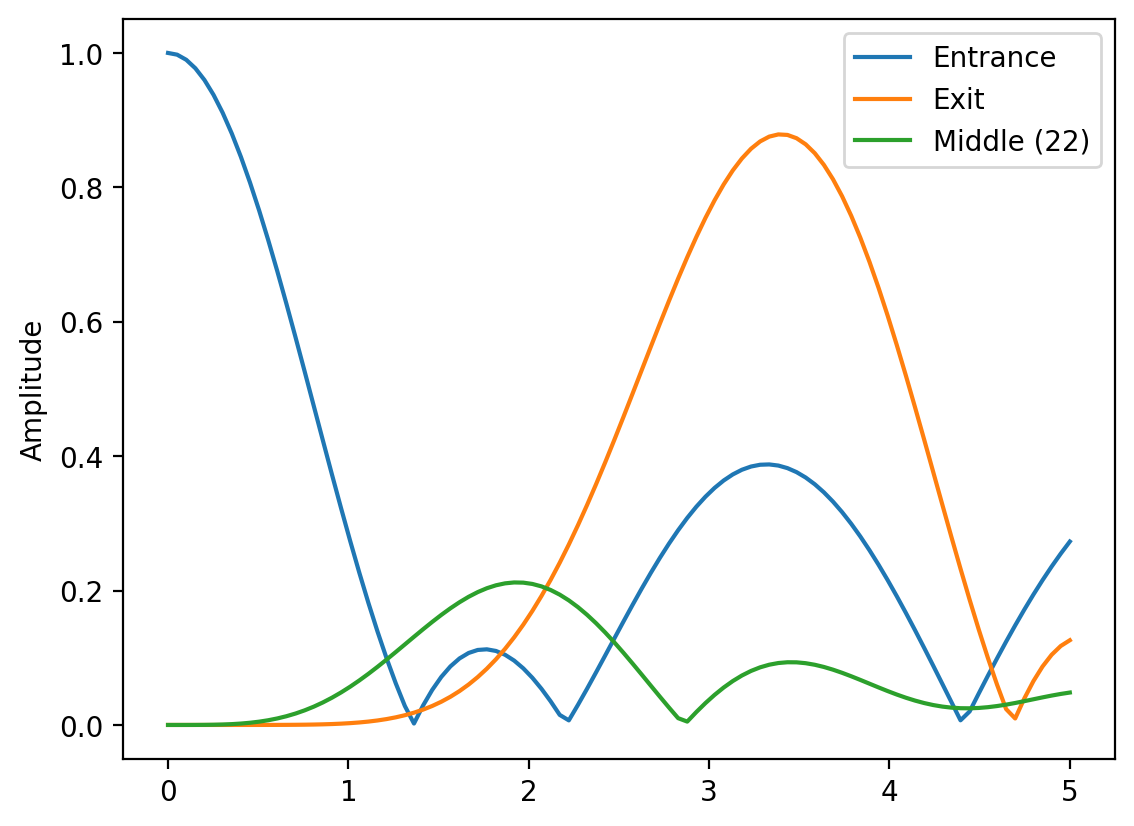

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, sharex=True)
axes.plot(t_list, np.abs(amp_entr), label='Entrance')
axes.plot(t_list, np.abs(amp_exit), label='Exit')
axes.plot(t_list, np.abs(amp_midd), label='Middle (22)')
axes.set_ylabel('Amplitude')
axes.legend()

fig.savefig(f'./figs/childs_glued_tree_depth_{depth}_dqpt_middle.pdf')

## [todo] recover Childs Thesis figure.5-4 Prob V.S. columns at three different timesteps (check the propogation)